# Loading and preprocssing Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import time
import matplotlib.pyplot as plt


In [15]:
# Load the dataset
url = 'Tetuan City power consumption.csv'
df = pd.read_csv(url)
print(df.head())


        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  

In [16]:
# Convert 'DateTime' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time, month, day of the week, quarter, and hour from 'DateTime'
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Quarter'] = df['DateTime'].dt.quarter
df['Hour'] = df['DateTime'].dt.hour


# Scaling Data
## This standardization step ensures that the neural network can train more effectively, leading to faster convergence, improved numerical stability, consistent activation ranges, equal contribution of features, and consistent internal representations across layers.








In [6]:

from sklearn.preprocessing import StandardScaler
x_columns = ["Month", "DayOfWeek", "Hour", "Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "Quarter"]
y_columns = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]

# Separate the features and target variables
X = df[x_columns]
y = df[y_columns]

# Initialize the StandardScaler for features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the features
X_scaled = scaler_X.fit_transform(X)

# Fit and transform the target variables
y_scaled = scaler_y.fit_transform(y)

# Convert the scaled arrays back to DataFrames for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=x_columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=y_columns)

# Display the first few rows of the scaled features and target
print(X_scaled_df.head())
print(y_scaled_df.head())

      Month  DayOfWeek      Hour  Temperature  Humidity  Wind Speed  \
0 -1.601748        1.5 -1.661325    -2.106645  0.356277   -0.798900   
1 -1.601748        1.5 -1.661325    -2.131578  0.401291   -0.798900   
2 -1.601748        1.5 -1.661325    -2.148946  0.401291   -0.800178   
3 -1.601748        1.5 -1.661325    -2.181962  0.433443   -0.798900   
4 -1.601748        1.5 -1.661325    -2.216353  0.478456   -0.799752   

   general diffuse flows  diffuse flows   Quarter  
0              -0.690797      -0.603085 -1.349541  
1              -0.690725      -0.603359 -1.349541  
2              -0.690755      -0.603238 -1.349541  
3              -0.690646      -0.603270 -1.349541  
4              -0.690808      -0.603359 -1.349541  
   Zone 1 Power Consumption  Zone 2  Power Consumption  \
0                  0.239917                  -0.944672   
1                 -0.354854                  -0.320573   
2                 -0.451143                  -0.391398   
3                 -0.577254  

# Grid Search for ANN best Hyperparameters
## performing a grid search to find the best hyperparameters for training neural networks for predicting power consumption in different zones. The key elements of this code include iterating through different combinations of activation functions, number of neurons, and number of hidden layers, training a neural network for each combination, and storing the evaluation metrics.

In [10]:

def artificial_neural_networks(df, x_columns, y_column, num_hidden_layers=(10,), activation='relu'):
    start_time = time.perf_counter()
    X = df[x_columns].to_numpy()
    Y = df[y_column].to_numpy()

    kf = KFold(n_splits=5)

    test_performance = []
    rscore = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        scaler_X = StandardScaler()
        scaler_Y = StandardScaler()

        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)

        Y_train = scaler_Y.fit_transform(Y_train.reshape(-1, 1)).flatten()
        Y_test = scaler_Y.transform(Y_test.reshape(-1, 1)).flatten()

        clf = MLPRegressor(hidden_layer_sizes=num_hidden_layers, activation=activation, max_iter=300)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

        r2 = r2_score(Y_test, Y_pred)
        mape = mean_absolute_percentage_error(Y_test, Y_pred)

        rscore.append(r2)
        test_performance.append(mape)

    duration = (time.perf_counter() - start_time) / 60
    return (np.mean(rscore), np.mean(test_performance), np.std(test_performance), duration)

results_nn = pd.DataFrame()
idx = 0



In [ ]:

for y_column in y_columns:
    for activation in ["tanh", "relu"]:
        for neurons in [8, 16]:
            for hidden_layers in [1, 3]:
                idx += 1
                hidden_layer_sizes = tuple(hidden_layers * [neurons])
                r2, mape, confidence_interval, duration = artificial_neural_networks(df, x_columns, y_column, hidden_layer_sizes, activation)
                results_nn.loc[idx, 'Zone'] = y_column
                results_nn.loc[idx, 'Activation'] = activation
                results_nn.loc[idx, 'Neurons'] = neurons
                results_nn.loc[idx, 'Hidden Layers'] = hidden_layers
                results_nn.loc[idx, 'R2'] = r2
                results_nn.loc[idx, 'MAPE'] = mape
                results_nn.loc[idx, 'Confidence Interval'] = confidence_interval
                results_nn.loc[idx, 'Duration (m)'] = duration
                print(f"Zone: {y_column} - Activation: {activation} - Neurons: {neurons} - Hidden Layers: {hidden_layers} - R2: {r2} - MAPE: {mape} - Confidence Interval: {confidence_interval}, Duration: {duration}")

print(results_nn)

## This cell takes long time to run, and each ime we changed the range of search (for hyperparameters) and here is an example of output
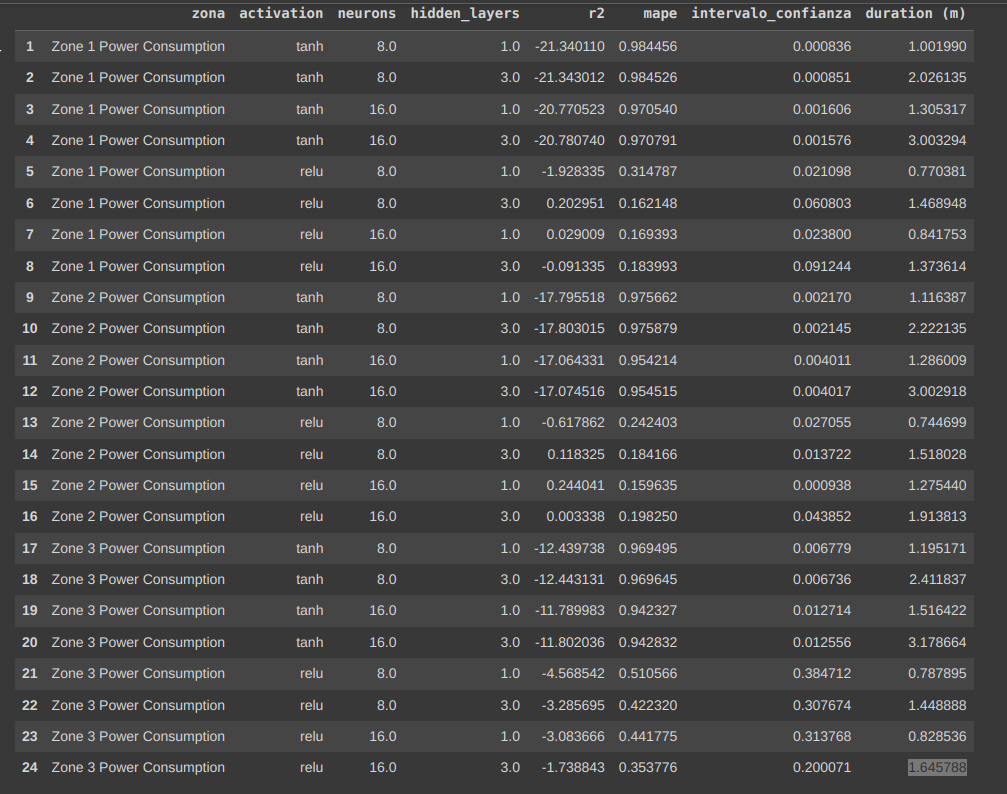

## Training the model with 3 hidden layers

In [18]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time, month, day of the week, quarter, and hour from 'DateTime'
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Quarter'] = df['DateTime'].dt.quarter
df['Hour'] = df['DateTime'].dt.hour
# Best model parameters for each zone
activation_function = 'relu'
number_of_neurons = 8
number_of_hidden_layers = 3
hidden_layer_sizes = tuple(number_of_hidden_layers * [number_of_neurons])

# Results DataFrame to store the results
results_best_models = pd.DataFrame()

# Train the best model for each zone
for y_column in y_columns:
    r2, mape, confidence_interval, duration = artificial_neural_networks(df, x_columns, y_column, hidden_layer_sizes, activation_function)
    results_best_models.loc[y_column, 'Activation'] = activation_function
    results_best_models.loc[y_column, 'Neurons'] = number_of_neurons
    results_best_models.loc[y_column, 'Hidden Layers'] = number_of_hidden_layers
    results_best_models.loc[y_column, 'R2'] = r2
    results_best_models.loc[y_column, 'MAPE'] = mape
    results_best_models.loc[y_column, 'Confidence Interval'] = confidence_interval
    results_best_models.loc[y_column, 'Duration (m)'] = duration
    print(f"Zone: {y_column} - Activation: {activation_function} - Neurons: {number_of_neurons} - Hidden Layers: {number_of_hidden_layers} - R2: {r2} - MAPE: {mape} - Confidence Interval: {confidence_interval}, Duration: {duration}")

print(results_best_models)

Zone: Zone 1 Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 3 - R2: 0.6854974425537463 - MAPE: 2.2178290786725325 - Confidence Interval: 0.814293626708891, Duration: 1.1159677994666708
Zone: Zone 2  Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 3 - R2: -0.18646611478518976 - MAPE: 5.361598843598246 - Confidence Interval: 1.4578982555870903, Duration: 1.9835480399333316
Zone: Zone 3  Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 3 - R2: 0.33506241694474476 - MAPE: 7.31924980521392 - Confidence Interval: 9.157855726726469, Duration: 1.0836826060833347
                          Activation  Neurons  Hidden Layers        R2  \
Zone 1 Power Consumption        relu      8.0            3.0  0.685497   
Zone 2  Power Consumption       relu      8.0            3.0 -0.186466   
Zone 3  Power Consumption       relu      8.0            3.0  0.335062   

                               MAPE  Confidence Interval  Duration (m)  
Zone 1 Power

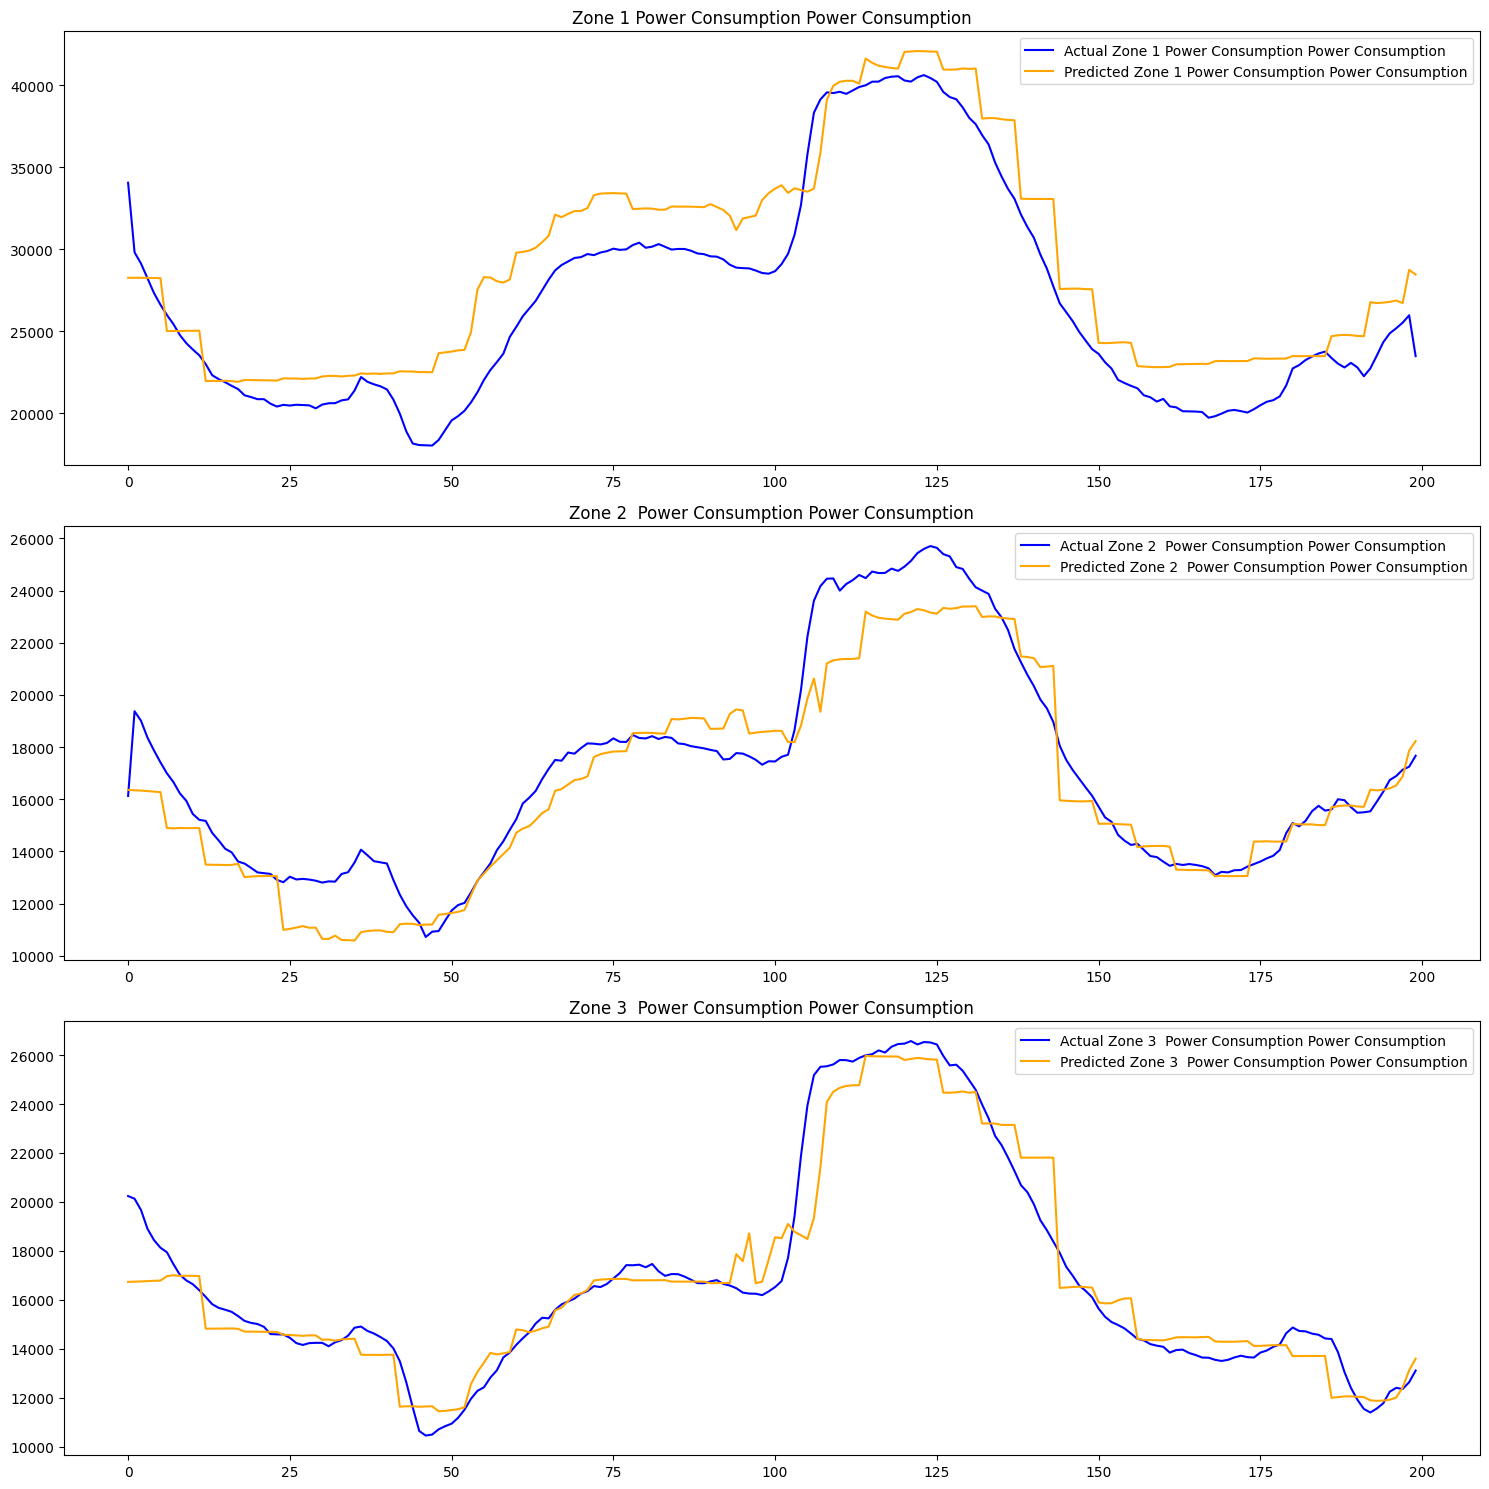

In [ ]:

def plot_results(actual, predicted, zone_name, ax):
    ax.plot(actual[:200], label=f'Actual {zone_name} Power Consumption', color='blue')
    ax.plot(predicted[:200], label=f'Predicted {zone_name} Power Consumption', color='orange')
    ax.set_title(f'{zone_name} Power Consumption')
    ax.legend()

# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for idx, y_column in enumerate(y_columns):
    # Train the best model for the zone
    hidden_layer_sizes = (8, 8, 8)
    r2, mape, confidence_interval, duration = artificial_neural_networks(df, x_columns, y_column, hidden_layer_sizes, 'relu')

    # Predict the values using the trained model
    X = df[x_columns].to_numpy()
    Y = df[y_column].to_numpy()

    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=300)
    model.fit(X_scaled, Y_scaled)
    Y_pred_scaled = model.predict(X_scaled)
    Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()

    # Plot the results
    plot_results(Y, Y_pred, y_column, axes[idx])

plt.tight_layout()
plt.show()


## Training the model with  hidden layers

In [ ]:
# Best model parameters for each zone
activation_function = 'relu'
number_of_neurons = 8
number_of_hidden_layers = 1
hidden_layer_sizes = tuple(number_of_hidden_layers * [number_of_neurons])

# Results DataFrame to store the results
results_best_models = pd.DataFrame()

# Train the best model for each zone
for y_column in y_columns:
    r2, mape, confidence_interval, duration = artificial_neural_networks(df, x_columns, y_column, hidden_layer_sizes, activation_function)
    results_best_models.loc[y_column, 'Activation'] = activation_function
    results_best_models.loc[y_column, 'Neurons'] = number_of_neurons
    results_best_models.loc[y_column, 'Hidden Layers'] = number_of_hidden_layers
    results_best_models.loc[y_column, 'R2'] = r2
    results_best_models.loc[y_column, 'MAPE'] = mape
    results_best_models.loc[y_column, 'Confidence Interval'] = confidence_interval
    results_best_models.loc[y_column, 'Duration (m)'] = duration
    print(f"Zone: {y_column} - Activation: {activation_function} - Neurons: {number_of_neurons} - Hidden Layers: {number_of_hidden_layers} - R2: {r2} - MAPE: {mape} - Confidence Interval: {confidence_interval}, Duration: {duration}")

print(results_best_models)

Zone: Zone 1 Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 1 - R2: 0.7565254673149892 - MAPE: 2.552461363843876 - Confidence Interval: 0.8519695147490959, Duration: 0.7594149441500008
Zone: Zone 2  Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 1 - R2: 0.4448432689451094 - MAPE: 3.644081360723694 - Confidence Interval: 0.8676135417098046, Duration: 0.6836244480000004
Zone: Zone 3  Power Consumption - Activation: relu - Neurons: 8 - Hidden Layers: 1 - R2: -1.7758525081842358 - MAPE: 7.636636798392355 - Confidence Interval: 9.515279488976445, Duration: 0.6099454396500013
                          Activation  Neurons  Hidden Layers        R2  \
Zone 1 Power Consumption        relu      8.0            1.0  0.756525   
Zone 2  Power Consumption       relu      8.0            1.0  0.444843   
Zone 3  Power Consumption       relu      8.0            1.0 -1.775853   

                               MAPE  Confidence Interval  Duration (m)  
Zone 1 Power 

## Best ANN model result

Epoch 1/10
1049/1049 [==============================] - 3s 2ms/step - loss: 0.6198 - mse: 0.6198 - val_loss: 0.3689 - val_mse: 0.3689
Epoch 2/10
1049/1049 [==============================] - 3s 3ms/step - loss: 0.3611 - mse: 0.3611 - val_loss: 0.3439 - val_mse: 0.3439
Epoch 3/10
1049/1049 [==============================] - 3s 3ms/step - loss: 0.3460 - mse: 0.3460 - val_loss: 0.3360 - val_mse: 0.3360
Epoch 4/10
1049/1049 [==============================] - 2s 2ms/step - loss: 0.3407 - mse: 0.3407 - val_loss: 0.3305 - val_mse: 0.3305
Epoch 5/10
1049/1049 [==============================] - 2s 2ms/step - loss: 0.3343 - mse: 0.3343 - val_loss: 0.3234 - val_mse: 0.3234
Epoch 6/10
1049/1049 [==============================] - 2s 2ms/step - loss: 0.3280 - mse: 0.3280 - val_loss: 0.3192 - val_mse: 0.3192
Epoch 7/10
1049/1049 [==============================] - 2s 2ms/step - loss: 0.3237 - mse: 0.3237 - val_loss: 0.3137 - val_mse: 0.3137
Epoch 8/10
1049/1049 [==============================] - 3s 3ms

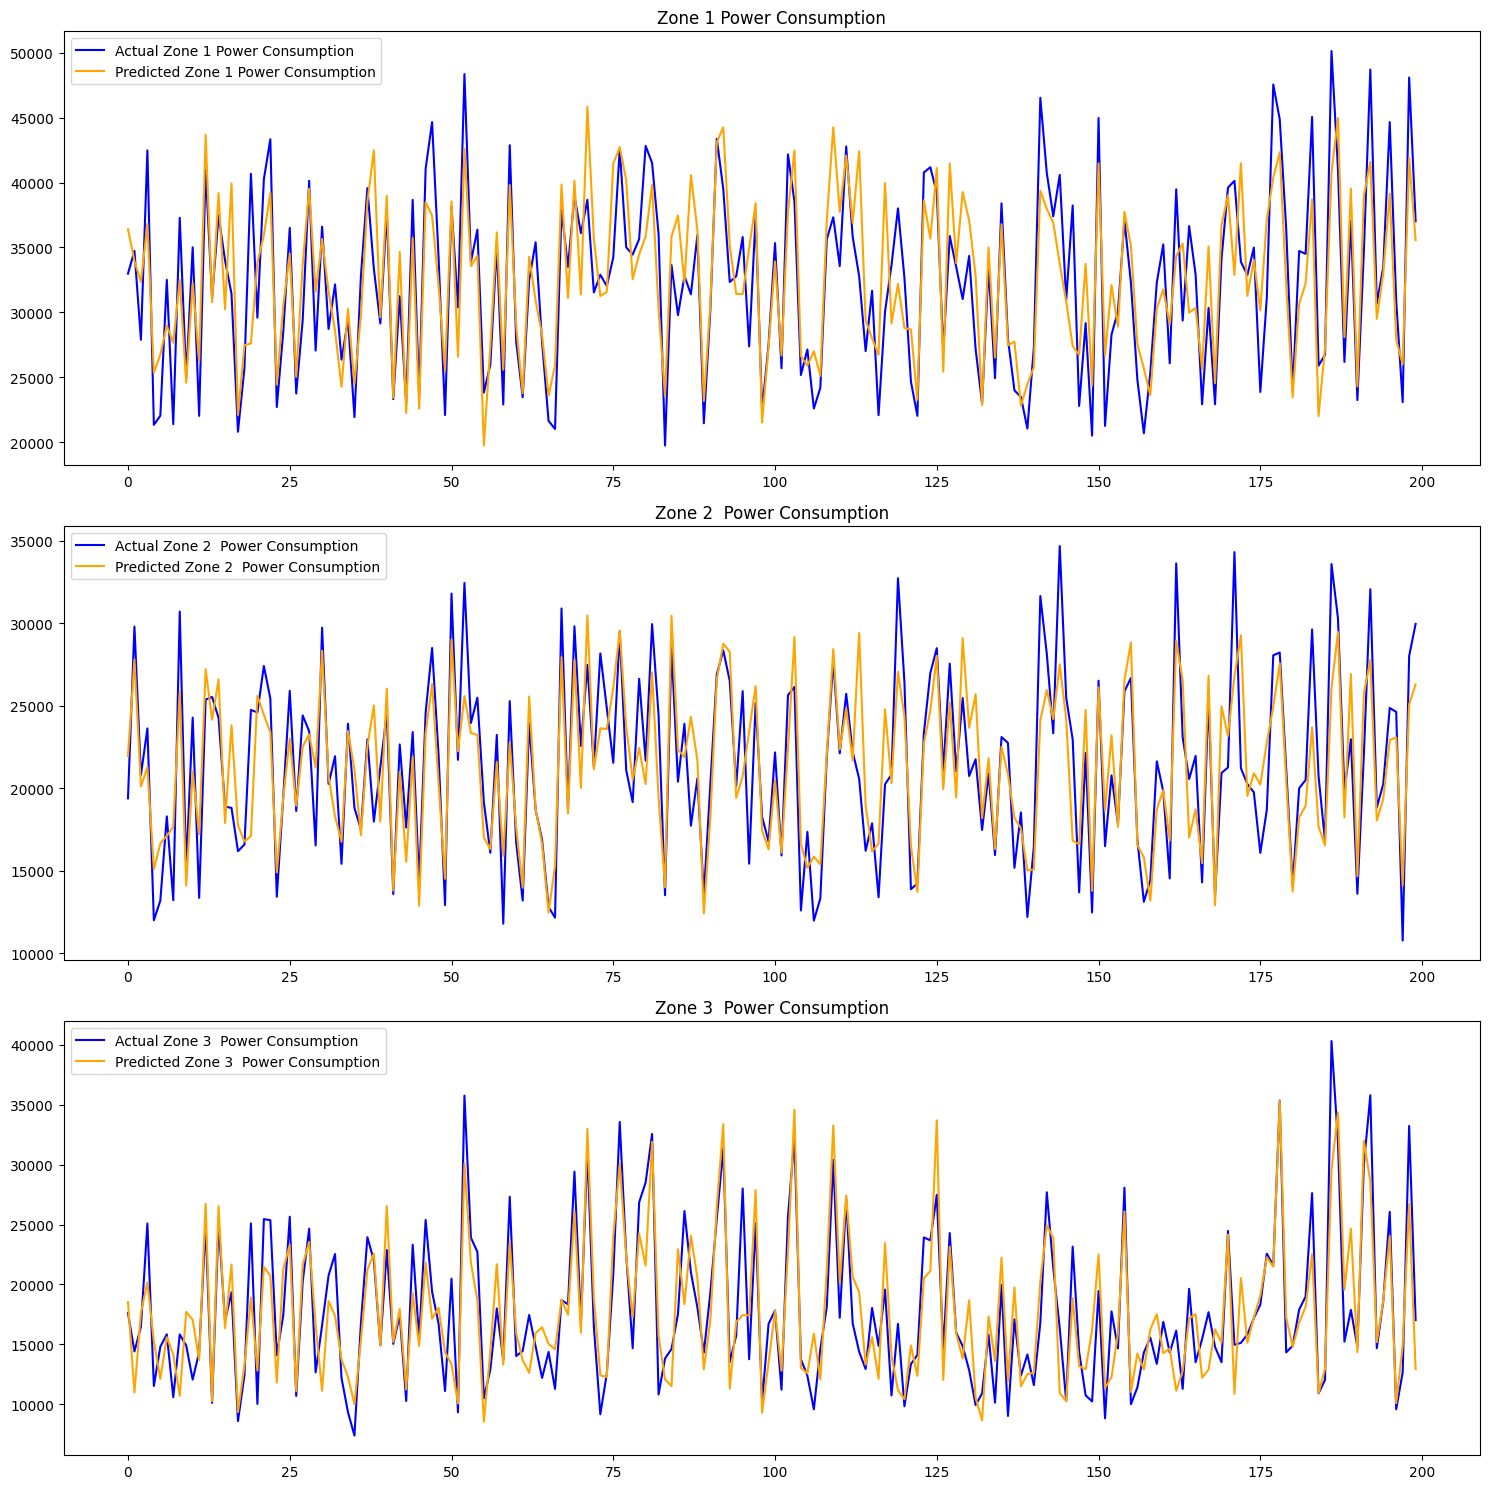

In [ ]:

# reLoad the dataset (to make sure we have a fresh version)
df = pd.read_csv("Tetuan City power consumption.csv")

# Convert 'DateTime' to datetime format and extract additional features
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["Month"] = df["DateTime"].dt.month
df["DayWeek"] = df["DateTime"].dt.dayofweek
df["Hour"] = df["DateTime"].dt.hour
df["Quarter"] = df["DateTime"].dt.quarter

# Define the input features and target columns
x_columns = ["Month", "DayWeek", "Hour", "Temperature", "Humidity", "Wind Speed", "Quarter"]
y_columns = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]

# Normalize the features
scaler_X = StandardScaler()
X = df[x_columns]
X_scaled = scaler_X.fit_transform(X)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

for i, y_column in enumerate(y_columns):
    y = df[[y_column]]

    # Normalize the target variable
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    # Define the MLP-ANN model
    model = Sequential()
    model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 5 neurons and ReLU activation
    model.add(Dense(1, activation='linear'))  # Output layer with linear activation

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mse'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform the predictions to original scale
    y_pred_original = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test)

    # Calculate R2, MAE, MSE, RMSE
    r2 = r2_score(y_test_original, y_pred_original)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    mse = mean_squared_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mse)

    print(f"Zone: {y_column}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

    # Select a small part of the data to visualize
    num_points = 200
    y_test_original_part = y_test_original[:num_points]
    y_pred_original_part = y_pred_original[:num_points]

    # Plot predicted vs real values for each zone
    axes[i].plot(y_test_original_part, label=f'Actual {y_column}', color='blue')
    axes[i].plot(y_pred_original_part, label=f'Predicted {y_column}', color='orange')
    axes[i].set_title(f'{y_column}')
    axes[i].legend()

plt.tight_layout()
plt.show()


# RNN model using GRU

## A Gated Recurrent Unit (GRU) is a type of Recurrent Neural Network (RNN) that is designed to handle sequence data and time-series data more efficiently than traditional RNNs. GRUs were introduced to address some of the limitations of standard RNNs, such as the vanishing gradient problem, which makes it difficult for standard RNNs to learn long-term dependencies in sequences.
## How GRU Works:
Gate Mechanisms: GRUs use gate mechanisms to control the flow of information, which helps in preserving long-term dependencies and discarding irrelevant information.






In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence

# Load the dataset
df = pd.read_csv('Tetuan City power consumption.csv')

# Convert 'DateTime' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract relevant features from 'DateTime'
df['Time'] = df['DateTime'].dt.hour * 3600 + df['DateTime'].dt.minute * 60 + df['DateTime'].dt.second
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Remove 'DateTime' column
df = df.drop('DateTime', axis=1)

# Standardize the features and target variables
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Split the data into training and test sets
split_idx = int(0.8 * len(df))
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

# Generator class for data batching
class DataGenerator(Sequence):
    def __init__(self, data, lag=4320, lead=4320, batch_size=144):
        self.data = data
        self.lag = lag
        self.lead = lead
        self.batch_size = batch_size
        self.indices = np.arange(lag, len(data) - lead)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_indices)
        return X, y

    def __data_generation(self, batch_indices):
        X = np.zeros((len(batch_indices), self.lag, self.data.shape[1]))
        y = np.zeros((len(batch_indices), 3))  # Assuming 3 target columns for the final prediction

        for i, idx in enumerate(batch_indices):
            X[i] = self.data.iloc[idx - self.lag:idx].values
            y[i] = self.data.iloc[idx][['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].values  # Predict the target at the lead time

        return X, y

# Create data generators for training and testing
train_generator = DataGenerator(train_df, batch_size=144)
test_generator = DataGenerator(test_df, batch_size=144)

# Define the model
model = Sequential([
    GRU(16, activation='tanh', input_shape=(4320, train_df.shape[1]), return_sequences=True),
    Dropout(0.2),  # Add dropout for regularization
    GRU(16, activation='tanh'),
    Dropout(0.2),  # Add dropout for regularization
    Dense(3, activation='linear')  # Assuming 3 outputs corresponding to 3 zones
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the generator
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set using the generator
test_loss = model.evaluate(test_generator, verbose=1)

# Print the test loss
print("Test Loss:", test_loss)


Epoch 1/10
232/232 - 81s - loss: 0.3722 - val_loss: 0.3893 - 81s/epoch - 349ms/step
Epoch 2/10
232/232 - 82s - loss: 0.2457 - val_loss: 0.3200 - 82s/epoch - 354ms/step
Epoch 3/10
232/232 - 74s - loss: 0.2100 - val_loss: 0.2873 - 74s/epoch - 318ms/step
Epoch 4/10
232/232 - 74s - loss: 0.1866 - val_loss: 0.2468 - 74s/epoch - 320ms/step
Epoch 5/10
232/232 - 74s - loss: 0.1732 - val_loss: 0.2208 - 74s/epoch - 319ms/step
Epoch 6/10
232/232 - 75s - loss: 0.1652 - val_loss: 0.2204 - 75s/epoch - 324ms/step
Epoch 7/10
232/232 - 77s - loss: 0.1603 - val_loss: 0.2175 - 77s/epoch - 331ms/step
Epoch 8/10
232/232 - 74s - loss: 0.1569 - val_loss: 0.2071 - 74s/epoch - 317ms/step
Epoch 9/10
232/232 - 75s - loss: 0.1536 - val_loss: 0.2090 - 75s/epoch - 321ms/step
Epoch 10/10
232/232 - 80s - loss: 0.1510 - val_loss: 0.2027 - 80s/epoch - 344ms/step
13/13 [==============================] - 3s 203ms/step - loss: 0.2027
Test Loss: 0.20268914103507996


13/13 [==============================] - 4s 259ms/step


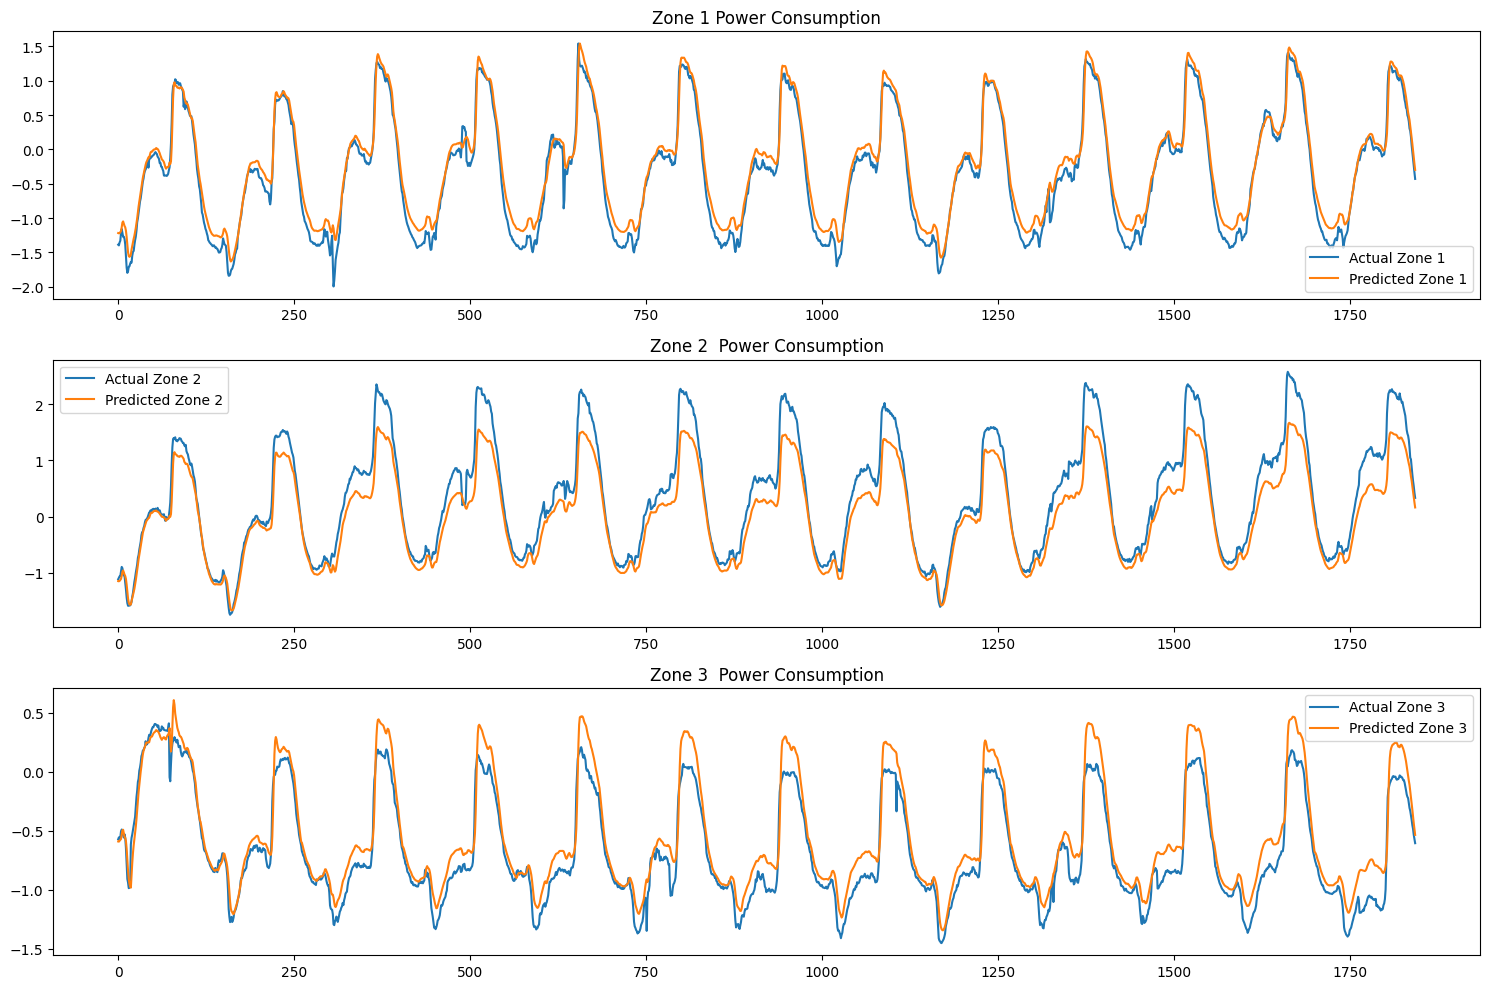

In [9]:
# Generate predictions on the test set
predictions = model.predict(test_generator)

# Create a new scaler specifically for the target columns
target_columns = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
scaler_targets = StandardScaler()

# Fit the scaler on the target columns of the training data
scaler_targets.fit(train_df[target_columns])

# Convert predictions and actual values back to original scale
y_test_actual = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])
y_test_actual = scaler_targets.inverse_transform(y_test_actual)
predictions = scaler_targets.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(15, 10))

# Zone 1
plt.subplot(3, 1, 1)
plt.plot(y_test_actual[:, 0], label='Actual Zone 1')
plt.plot(predictions[:, 0], label='Predicted Zone 1')
plt.title('Zone 1 Power Consumption')
plt.legend()

# Zone 2
plt.subplot(3, 1, 2)
plt.plot(y_test_actual[:, 1], label='Actual Zone 2')
plt.plot(predictions[:, 1], label='Predicted Zone 2')
plt.title('Zone 2  Power Consumption')
plt.legend()

# Zone 3
plt.subplot(3, 1, 3)
plt.plot(y_test_actual[:, 2], label='Actual Zone 3')
plt.plot(predictions[:, 2], label='Predicted Zone 3')
plt.title('Zone 3  Power Consumption')
plt.legend()

plt.tight_layout()
plt.show()
